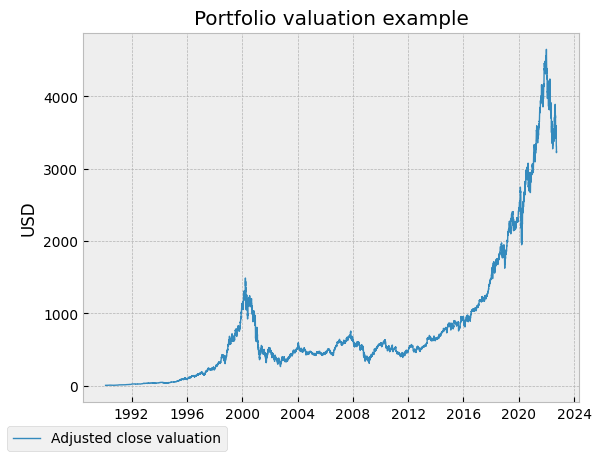

In [1]:
# Sample portfolio
# This sample code creates a portfolio with some undated transactions and graph the portfolio valuations

from Portfolio import Portfolio
from Valuations import PortfolioValuator
from TimeSeries import TimeSeries
import numpy as npplt
import pandas as pd
import matplotlib.pyplot as plt 


p:Portfolio = Portfolio()
p.buy('MSFT', 10)
p.buy('CSCO', 20)
v:PortfolioValuator = PortfolioValuator(portfolio=p)
adjclose_ts:TimeSeries = v.get_valuations()
    
# We are getting access to the underlying Numpy array in order to graph it
adjclose_vector = adjclose_ts.get_full_time_series()
# We are getting access to the dates in order to display them on the horizontal axis
dates = pd.date_range(adjclose_ts.get_start_date(), adjclose_ts.get_end_date(), freq='D')
# And we graph the data with style
plt.style.use('bmh')
fig, ax = plt.subplots()
ax.set_title("Portfolio valuation example")
ax.set_ylabel("USD")

adjusted_close_line, = ax.plot(dates, adjclose_vector, linewidth=1)

fig.legend((adjusted_close_line,), ('Adjusted close valuation',), loc='lower left')

plt.show()
